In [1]:
from tensorflow.keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

57026/57026 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [2]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

In [3]:
def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dense(1)
    ])
    model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
    return model

In [5]:
import numpy as np

In [12]:
from tensorflow import keras
from tensorflow.keras import layers

In [13]:
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
    print(f"#{i}번째 폴드 처리중")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    model.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=16, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

#0번째 폴드 처리중
#1번째 폴드 처리중
#2번째 폴드 처리중
#3번째 폴드 처리중


In [14]:
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print(f"#{i}번째 폴드 처리중")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=16, verbose=0)
    mae_history = history.history["val_mae"]
    all_mae_histories.append(mae_history)

#0번째 폴드 처리중
#1번째 폴드 처리중
#2번째 폴드 처리중
#3번째 폴드 처리중


In [15]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

In [18]:
import matplotlib.pyplot as plt

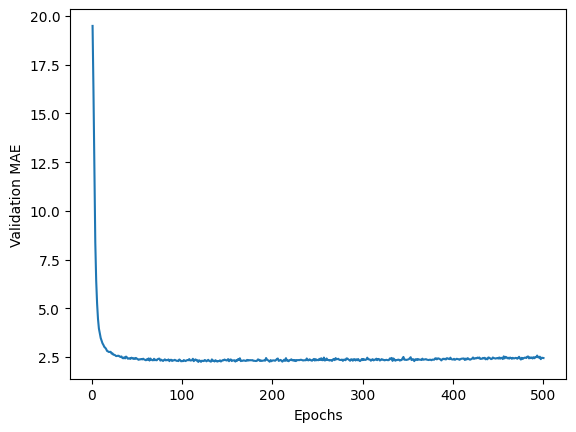

In [19]:
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

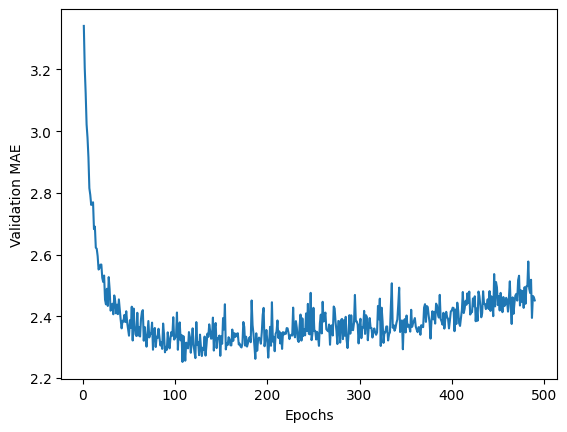

In [20]:
truncated_mae_history = average_mae_history[10:]
plt.plot(range(1, len(truncated_mae_history) + 1), truncated_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

In [21]:
model = build_model()
model.fit(train_data, train_targets,
          epochs=130, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - loss: 16.3163 - mae: 2.9209


In [22]:
test_mae_score

3.1308844089508057

In [23]:
predictions = model.predict(test_data)
predictions[0]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


array([7.4757147], dtype=float32)

In [24]:
from matplotlib import pyplot as plt    #사용자 정의 콜백

class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs):
        self.per_batch_losses = []

    def on_batch_end(self, batch, logs):
        self.per_batch_losses.append(logs.get("loss"))

    def on_epoch_end(self, epoch, logs):
        plt.clf()
        plt.plot(range(len(self.per_batch_losses)), self.per_batch_losses,
                 label="Training loss for each batch")
        plt.xlabel(f"Batch (epoch {epoch})")
        plt.ylabel("Loss")
        plt.legend()
        plt.savefig(f"plot_at_epoch_{epoch}")
        self.per_batch_losses = []

Epoch 1/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 541.1207 - mae: 21.2531
Epoch 2/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 356.7405 - mae: 16.8845   
Epoch 3/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 217.4741 - mae: 12.0311 
Epoch 4/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 88.4002 - mae: 7.2006  
Epoch 5/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 46.9560 - mae: 4.9991 
Epoch 6/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 27.6295 - mae: 3.8881 
Epoch 7/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 22.5108 - mae: 3.3089  
Epoch 8/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 19.4966 - mae: 3.0986  
Epoch 9/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 18.2006 - mae: 2.9657 
Epoch 10/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 15.0671 - mae: 2.7050  
Epoch 11/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 14.0522 - mae: 2.7456 
Epoch 12/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 14.7043 - mae: 2.7126  
Epoch 13/20


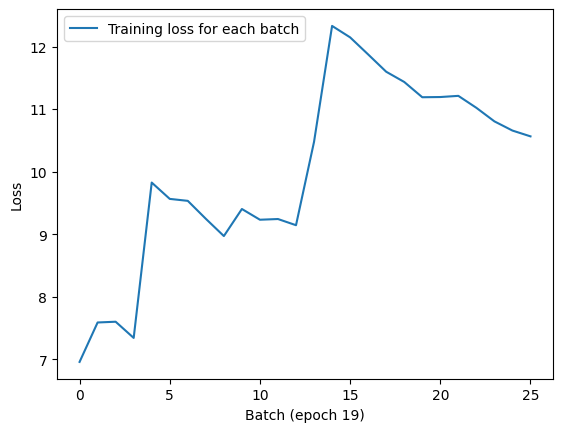

In [26]:
model = build_model()
model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
history = model.fit(train_data, train_targets,
                    epochs=20, batch_size=16,
                    callbacks=[LossHistory()])
#model.fit(train_data, train_targets,
#          epochs=130, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

Epoch 1/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 540.5607 - root_mean_squared_error: 23.2239
Epoch 2/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 401.0674 - root_mean_squared_error: 20.0144
Epoch 3/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 270.2186 - root_mean_squared_error: 16.4013  
Epoch 4/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 127.1544 - root_mean_squared_error: 11.2558 
Epoch 5/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 57.6474 - root_mean_squared_error: 7.5654    
Epoch 6/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 38.1729 - root_mean_squared_error: 6.1625 
Epoch 7/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 24.7538 - root_mean_squared_error: 4.9448 
Epoch 8/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 25.8082 - root_mean_squared_error: 5.0193  
Epoch 9/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 21.3926 - root_mean_squared_error: 4.6185  
Epoch 10/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 17.7573 - root_mean

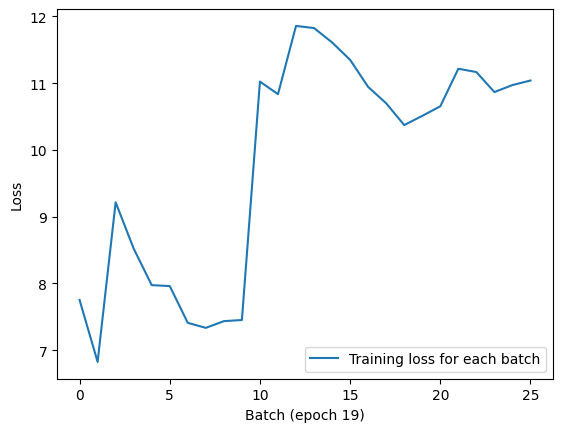

In [30]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.metrics import RootMeanSquaredError

# Assuming build_model is defined elsewhere
model = build_model()
model.compile(optimizer="rmsprop", loss="mse", metrics=[RootMeanSquaredError()])

# Convert train_targets to the correct data type if necessary
train_targets = tf.cast(train_targets, dtype=tf.int32)  # Change to tf.int64 if needed

history = model.fit(train_data, train_targets, epochs=20, batch_size=16, callbacks=[LossHistory()])


In [25]:
import tensorflow as tf      #사용자 정의 지표

class RootMeanSquaredError(keras.metrics.Metric):

    def __init__(self, name="rmse", **kwargs):  # **kwargs 키워드 인수 한꺼번에 딕셔너리 형식으로 받을 수 있음
        super().__init__(name=name, **kwargs)
        self.mse_sum = self.add_weight(name="mse_sum", initializer="zeros")   # initializer="zeros" 초기값을 0으로
        self.total_samples = self.add_weight(
            name="total_samples", initializer="zeros", dtype="int32")

    def update_state(self, y_true, y_pred, sample_weight=None):
        y_true = tf.one_hot(y_true, depth=tf.shape(y_pred)[1])
        mse = tf.reduce_sum(tf.square(y_true - y_pred))
        self.mse_sum.assign_add(mse)
        num_samples = tf.shape(y_pred)[0]
        self.total_samples.assign_add(num_samples)

    def result(self):
        return tf.sqrt(self.mse_sum / tf.cast(self.total_samples, tf.float32))

    def reset_state(self):
        self.mse_sum.assign(0.)
        self.total_samples.assign(0)

In [31]:
class RootMeanSquaredError(keras.metrics.Metric):

    def __init__(self, name="rmse", **kwargs):
        super().__init__(name=name, **kwargs)
        self.mse_sum = self.add_weight(name="mse_sum", initializer="zeros")
        self.total_samples = self.add_weight(name="total_samples", initializer="zeros", dtype="float32")  # float32로 변경

    def update_state(self, y_true, y_pred, sample_weight=None):
        y_true = tf.one_hot(y_true, depth=tf.shape(y_pred)[1])
        mse = tf.reduce_sum(tf.square(y_true - y_pred))
        self.mse_sum.assign_add(mse)
        num_samples = tf.cast(tf.shape(y_pred)[0], tf.float32)  # num_samples을 float32로 변환
        self.total_samples.assign_add(num_samples)

    def result(self):
        return tf.sqrt(self.mse_sum / self.total_samples)

    def reset_state(self):
        self.mse_sum.assign(0.)
        self.total_samples.assign(0.)


Epoch 1/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 512.6254 - rmse: 1.0791
Epoch 2/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 372.2832 - rmse: 4.6912 
Epoch 3/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 206.1758 - rmse: 9.7714 
Epoch 4/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 88.9065 - rmse: 16.6267  
Epoch 5/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 39.2834 - rmse: 22.1143  
Epoch 6/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 31.7494 - rmse: 22.8956 
Epoch 7/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 23.4055 - rmse: 23.6633
Epoch 8/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 24.6849 - rmse: 23.1749  
Epoch 9/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 21.1789 - rmse: 23.1911  
Epoch 10/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 16.4029 - rmse: 23.2479  
Epoch 11/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 17.3268 - rmse: 22.8003  
Epoch 12/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 17.5278 - rmse: 23.77

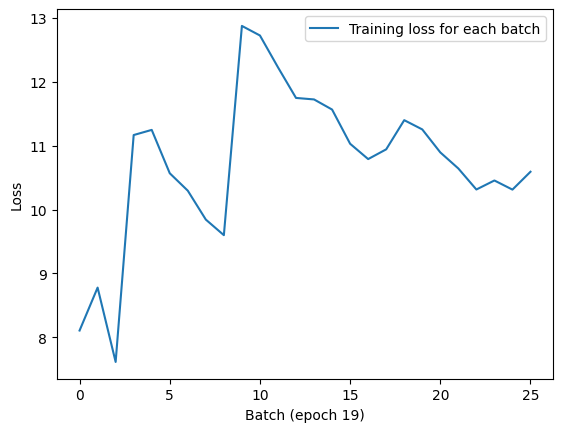

In [32]:
# 모델 빌드 및 컴파일
model = build_model()  # build_model 함수로 생성된 모델
model.compile(optimizer="rmsprop", loss="mse", metrics=[RootMeanSquaredError()])

# 모델 훈련
history = model.fit(train_data, train_targets, epochs=20, batch_size=16, callbacks=[LossHistory()])

1. 사용자 정의 지표 사용 모델
2. 사용자 정의 콜백 모델

In [34]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import boston_housing
import numpy as np

# 1. 데이터 준비
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

# 데이터 정규화
mean = train_data.mean(axis=0)
std = train_data.std(axis=0)
train_data = (train_data - mean) / std
test_data = (test_data - mean) / std

# 2. 사용자 정의 지표: RootMeanSquaredError 클래스 정의
class RootMeanSquaredError(keras.metrics.Metric):
    def __init__(self, name="rmse", **kwargs):
        super().__init__(name=name, **kwargs)
        self.mse_sum = self.add_weight(name="mse_sum", initializer="zeros")
        self.total_samples = self.add_weight(name="total_samples", initializer="zeros", dtype="float32")

    def update_state(self, y_true, y_pred, sample_weight=None):
        mse = tf.reduce_mean(tf.square(y_true - y_pred))
        self.mse_sum.assign_add(mse * tf.cast(tf.shape(y_true)[0], tf.float32))
        self.total_samples.assign_add(tf.cast(tf.shape(y_true)[0], tf.float32))

    def result(self):
        return tf.sqrt(self.mse_sum / self.total_samples)

    def reset_state(self):
        self.mse_sum.assign(0.0)
        self.total_samples.assign(0.0)

# 3. 사용자 정의 콜백
class CustomCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        print(f"에포크 {epoch+1} 종료: 손실={logs['loss']:.4f}, RMSE={logs['rmse']:.4f}")

# 4. 모델 빌드 함수 정의
def build_model():
    model = keras.Sequential([
        keras.layers.Dense(64, activation="relu", input_shape=(train_data.shape[1],)),
        keras.layers.Dense(64, activation="relu"),
        keras.layers.Dense(1)
    ])
    model.compile(optimizer="rmsprop", loss="mse", metrics=[RootMeanSquaredError()])
    return model

# 5. 모델 학습
model = build_model()
history = model.fit(train_data, train_targets,
                    epochs=10, batch_size=16,
                    validation_data=(test_data, test_targets),
                    callbacks=[CustomCallback()])


Epoch 1/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 555.6549 - rmse: 23.5243  에포크 1 종료: 손실=494.3559, RMSE=22.2051
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 553.3845 - rmse: 23.4755 - val_loss: 419.5145 - val_rmse: 20.5566
Epoch 2/10
 1/26 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 433.6443 - rmse: 20.7442에포크 2 종료: 손실=318.2332, RMSE=18.0301
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 353.9243 - rmse: 18.8623 - val_loss: 227.5473 - val_rmse: 15.8656
Epoch 3/10
 1/26 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 205.9010 - rmse: 14.1122에포크 3 종료: 손실=155.2266, RMSE=13.7666
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 191.8091 - rmse: 14.7324 - val_loss: 91.5135 - val_rmse: 12.3375
Epoch 4/10
 1/26 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 60.2640 - rmse: 9.3538에포크 4 종료: 손실=64.7441, RMSE=11.7226
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 72.2033 - rmse: 11.5728 - val_loss: 46.1804 - val_rmse: 12.0360
Epoch 5/10
 1/26 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 31.0198 - rmse: 

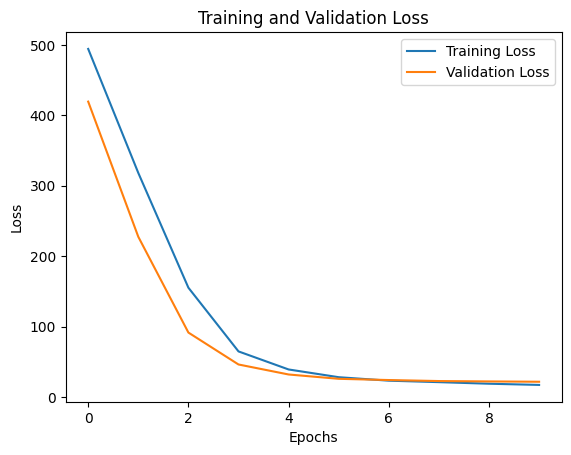

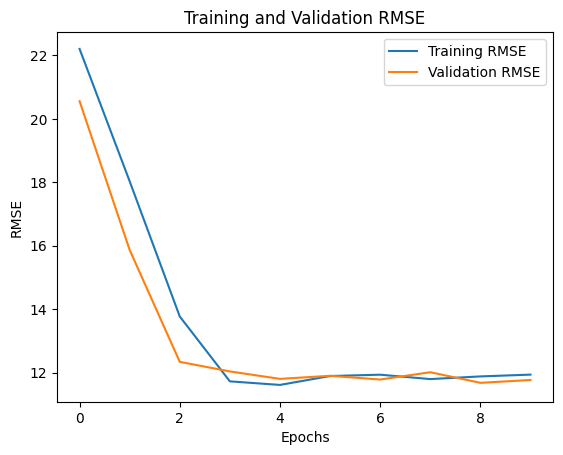

In [35]:
import matplotlib.pyplot as plt

# 학습 손실 및 검증 손실 그래프
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# 학습 RMSE 및 검증 RMSE 그래프
plt.plot(history.history['rmse'], label='Training RMSE')
plt.plot(history.history['val_rmse'], label='Validation RMSE')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.title('Training and Validation RMSE')
plt.legend()
plt.show()


2차

In [36]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import boston_housing
import numpy as np

# 1. 데이터 준비
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

# 데이터 정규화
mean = train_data.mean(axis=0)
std = train_data.std(axis=0)
train_data = (train_data - mean) / std
test_data = (test_data - mean) / std

# 2. 사용자 정의 지표: RootMeanSquaredError 클래스 정의
class RootMeanSquaredError(keras.metrics.Metric):
    def __init__(self, name="rmse", **kwargs):
        super().__init__(name=name, **kwargs)
        self.mse_sum = self.add_weight(name="mse_sum", initializer="zeros")
        self.total_samples = self.add_weight(name="total_samples", initializer="zeros", dtype="float32")

    def update_state(self, y_true, y_pred, sample_weight=None):
        mse = tf.reduce_mean(tf.square(y_true - y_pred))
        self.mse_sum.assign_add(mse * tf.cast(tf.shape(y_true)[0], tf.float32))
        self.total_samples.assign_add(tf.cast(tf.shape(y_true)[0], tf.float32))

    def result(self):
        return tf.sqrt(self.mse_sum / self.total_samples)

    def reset_state(self):
        self.mse_sum.assign(0.0)
        self.total_samples.assign(0.0)

# 3. 사용자 정의 콜백
class CustomCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        print(f"에포크 {epoch+1} 종료: 손실={logs['loss']:.4f}, RMSE={logs['rmse']:.4f}")

# 4. 모델 빌드 함수 정의
def build_model():
    model = keras.Sequential([
        keras.layers.Dense(64, activation="relu", input_shape=(train_data.shape[1],)),
        keras.layers.Dense(64, activation="relu"),
        keras.layers.Dense(1)
    ])
    model.compile(optimizer="rmsprop", loss="mse", metrics=[RootMeanSquaredError()])
    return model

# 5. 모델 학습
model = build_model()
history = model.fit(train_data, train_targets,
                    epochs=300, batch_size=16,
                    validation_data=(test_data, test_targets),
                    callbacks=[CustomCallback()])


Epoch 1/300
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 559.4110 - rmse: 23.6694  에포크 1 종료: 손실=507.5531, RMSE=22.5618
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 557.4904 - rmse: 23.6284 - val_loss: 440.8637 - val_rmse: 21.0777
Epoch 2/300
 1/26 ━━━━━━━━━━━━━━━━━━━━ 6s 268ms/step - loss: 431.1226 - rmse: 21.0758에포크 2 종료: 손실=333.8553, RMSE=18.4427
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 370.2481 - rmse: 19.3678 - val_loss: 249.0876 - val_rmse: 16.3407
Epoch 3/300
 1/26 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - loss: 210.9386 - rmse: 14.6045에포크 3 종료: 손실=168.8698, RMSE=14.0508
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 207.4755 - rmse: 15.0933 - val_loss: 113.2890 - val_rmse: 12.8542
Epoch 4/300
 1/26 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 67.4074 - rmse: 9.8261에포크 4 종료: 손실=75.4358, RMSE=11.9317
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 71.1822 - rmse: 10.8361 - val_loss: 55.3505 - val_rmse: 11.7210
Epoch 5/300
 1/26 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - loss: 36.8946 -

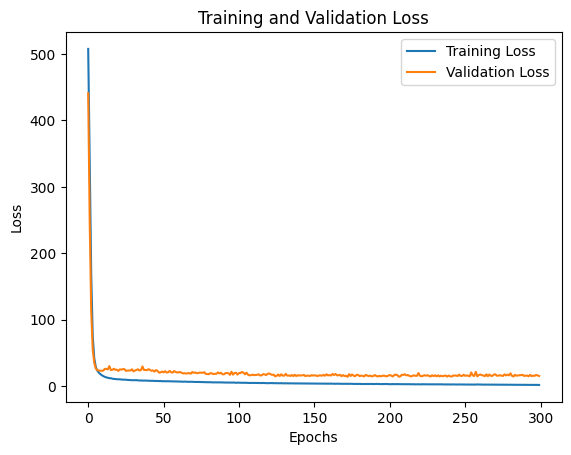

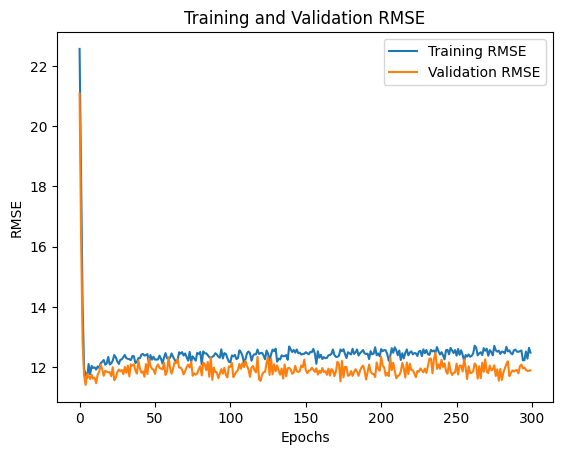

In [37]:
import matplotlib.pyplot as plt

# 학습 손실 및 검증 손실 그래프
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# 학습 RMSE 및 검증 RMSE 그래프
plt.plot(history.history['rmse'], label='Training RMSE')
plt.plot(history.history['val_rmse'], label='Validation RMSE')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.title('Training and Validation RMSE')
plt.legend()
plt.show()


다시 RMSE로

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import boston_housing
import numpy as np

# 1. 데이터 준비
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

# 데이터 정규화
mean = train_data.mean(axis=0)
std = train_data.std(axis=0)
train_data = (train_data - mean) / std
test_data = (test_data - mean) / std

# 2. 사용자 정의 지표: RootMeanSquaredError 클래스 정의
class RootMeanSquaredError(keras.metrics.Metric):
    def __init__(self, name="rmse", **kwargs):
        super().__init__(name=name, **kwargs)
        self.mse_sum = self.add_weight(name="mse_sum", initializer="zeros")
        self.total_samples = self.add_weight(name="total_samples", initializer="zeros", dtype="float32")

    def update_state(self, y_true, y_pred, sample_weight=None):
        # 예측값과 실제값의 차이를 제곱하여 합계 계산
        mse = tf.reduce_sum(tf.square(y_true - y_pred))
        self.mse_sum.assign_add(mse)

        # 현재 배치의 샘플 개수를 total_samples에 누적
        num_samples = tf.cast(tf.shape(y_pred)[0], tf.float32)
        self.total_samples.assign_add(num_samples)

    def result(self):
        # 누적된 mse_sum을 total_samples로 나누고 제곱근을 취해 RMSE 반환
        return tf.sqrt(self.mse_sum / self.total_samples)

    def reset_state(self):
        # 에포크마다 mse_sum과 total_samples를 초기화
        self.mse_sum.assign(0.)
        self.total_samples.assign(0.)


# 3. 사용자 정의 콜백
class CustomCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        print(f"에포크 {epoch+1} 종료: 손실={logs['loss']:.4f}, RMSE={logs['rmse']:.4f}")

# 4. 모델 빌드 함수 정의
def build_model():
    model = keras.Sequential([
        keras.layers.Dense(64, activation="relu", input_shape=(train_data.shape[1],)),
        keras.layers.Dense(64, activation="relu"),
        keras.layers.Dense(1)
    ])
    model.compile(optimizer="rmsprop", loss="mse", metrics=[RootMeanSquaredError()])
    return model

# 5. 모델 학습
model = build_model()
history = model.fit(train_data, train_targets,
                    epochs=300, batch_size=16,
                    validation_data=(test_data, test_targets),
                    callbacks=[CustomCallback()])


57026/57026 ━━━━━━━━━━━━━━━━━━━━ 2s 33us/step


c:\Users\KEB-Mobility\anaconda3\envs\aiffel\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/300
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 549.0377 - rmse: 93.7640에포크 1 종료: 손실=523.2778, RMSE=91.0312
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 548.0837 - rmse: 93.6628 - val_loss: 466.7664 - val_rmse: 84.2519
Epoch 2/300
 5/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 491.2567 - rmse: 89.5616에포크 2 종료: 손실=360.7389, RMSE=77.2824
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 417.1312 - rmse: 82.5827 - val_loss: 285.5319 - val_rmse: 68.1186
Epoch 3/300
 8/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 257.7763 - rmse: 68.0797 에포크 3 종료: 손실=194.1837, RMSE=61.1003
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 231.0585 - rmse: 65.0208 - val_loss: 141.3809 - val_rmse: 53.8589
Epoch 4/300
 3/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 134.7419 - rmse: 54.7687 에포크 4 종료: 손실=91.3254, RMSE=49.9458
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 106.3824 - rmse: 51.8600 - val_loss: 72.5012 - val_rmse: 48.2353
Epoch 5/300
 8/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 75.8631 - rm

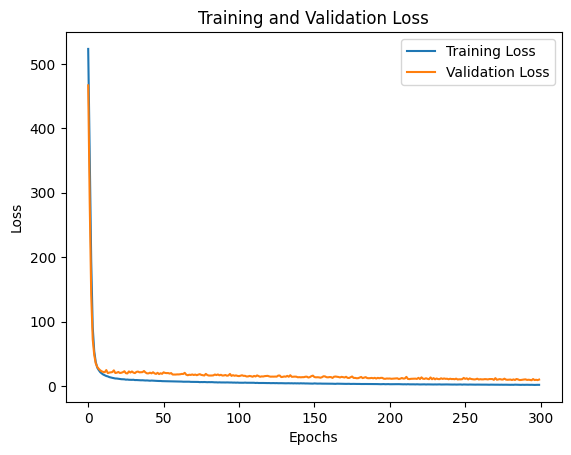

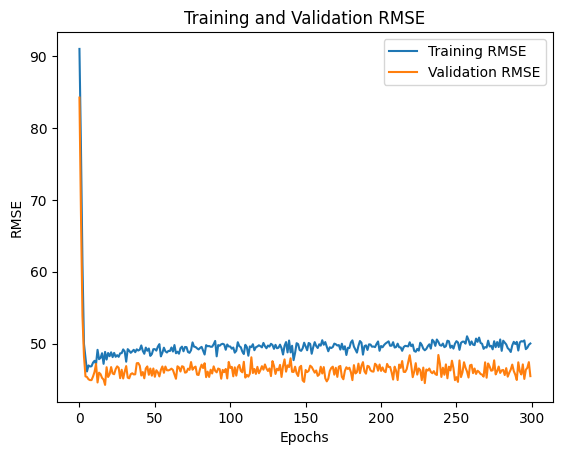

In [3]:
import matplotlib.pyplot as plt

# Training and validation loss plot
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Training and validation RMSE plot
plt.plot(history.history['rmse'], label='Training RMSE')
plt.plot(history.history['val_rmse'], label='Validation RMSE')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.title('Training and Validation RMSE')
plt.legend()
plt.show()


< 회고 >
고은비: 추후 커스터마이즈된 모델을 사용할 수 있도록, 사용자 지표 및 콜백 클래스를 정의하는 학습을 하였는데, 처음 설계 시 예상해보았던 결과처럼 값이 쉽게 구해지지 않았다. 어떠한 부분에서 수정할 필요가 있는지 계속 논의하였지만, 아직은 결론에 도달하지 못하였다.